In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.7.0


In [2]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [3]:
tokenizer = info.features['text'].encoder

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 conv1d (Conv1D)             (None, None, 128)         41088     
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
__________________________________________________

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 25s 52ms/step - loss: 0.4367 - accuracy: 0.7888 - val_loss: 0.3070 - val_accuracy: 0.8761
Epoch 2/10
391/391 [==============================] - 7s 18ms/step - loss: 0.2225 - accuracy: 0.9163 - val_loss: 0.3027 - val_accuracy: 0.8764
Epoch 3/10
391/391 [==============================] - 6s 16ms/step - loss: 0.1710 - accuracy: 0.9383 - val_loss: 0.3357 - val_accuracy: 0.8729
Epoch 4/10
391/391 [==============================] - 6s 14ms/step - loss: 0.1366 - accuracy: 0.9499 - val_loss: 0.3725 - val_accuracy: 0.8671
Epoch 5/10
391/391 [==============================] - 5s 12ms/step - loss: 0.1124 - accuracy: 0.9617 - val_loss: 0.4305 - val_accuracy: 0.8576
Epoch 6/10
391/391 [==============================] - 4s 11ms/step - loss: 0.0905 - accuracy: 0.9691 - val_loss: 0.4767 - val_accuracy: 0.8600
Epoch 7/10
391/391 [==============================] - 4s 11ms/step - loss: 0.0754 - accuracy: 0.9750 - val_loss: 0.5451 - val_accuracy: 0.857

In [9]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

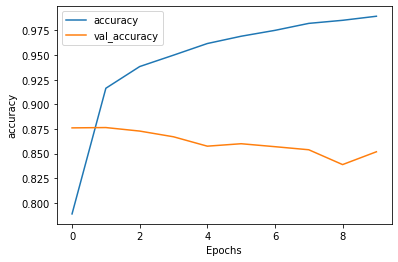

In [10]:
plot_graphs(history, 'accuracy')

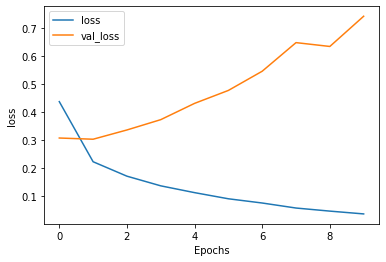

In [11]:
plot_graphs(history, 'loss')